In [139]:
import numpy as np
import pandas as pd
import matplotlib as plt
import math

In [140]:
df = pd.read_csv('./Pokemon.csv')
df2 =  df.sort_values("Type 1")
df.head(1)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False


In [141]:
df2.head()
df2 = df[df['Type 1'] =='Water']
df_water_train = df2.iloc[0:60]
df_water_test = df2.iloc[60:112]


In [142]:
df3 = df[df['Type 1'] =='Normal']
df_Normal_train = df2.iloc[0:50]
df_Normal_test = df2.iloc[50:98]

In [143]:
test = pd.concat([df_water_test,df_Normal_test],axis=0)

In [144]:
test.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
349,319,SharpedoMega Sharpedo,Water,Dark,560,70,140,70,110,65,105,3,False
350,320,Wailmer,Water,NaN,400,130,70,35,70,35,60,3,False
351,321,Wailord,Water,NaN,500,170,90,45,90,45,60,3,False
371,339,Barboach,Water,Ground,288,50,48,43,46,41,60,3,False
372,340,Whiscash,Water,Ground,468,110,78,73,76,71,60,3,False


In [145]:
df = df.iloc[0:400]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
#             400 non-null int64
Name          400 non-null object
Type 1        400 non-null object
Type 2        199 non-null object
Total         400 non-null int64
HP            400 non-null int64
Attack        400 non-null int64
Defense       400 non-null int64
Sp. Atk       400 non-null int64
Sp. Def       400 non-null int64
Speed         400 non-null int64
Generation    400 non-null int64
Legendary     400 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 38.0+ KB


Total_mean = df.loc[df['Type 1'] == 'Normal','Total'].mean()
HP_mean = df.loc[df['Type 1'] == 'Normal','HP'].mean()
Attack_mean = df.loc[df['Type 1'] == 'Normal','Attack'].mean()
Defense_mean = df.loc[df['Type 1'] == 'Normal','Defense'].mean()
Sp_Atk_mean = df.loc[df['Type 1'] == 'Normal','Sp. Atk'].mean()
Sp_Def_mean = df.loc[df['Type 1'] == 'Normal','Sp. Def'].mean()
Speed_mean = df.loc[df['Type 1'] == 'Normal','Speed'].mean()

In [146]:
import matplotlib.pyplot as plt
%matplotlib inline

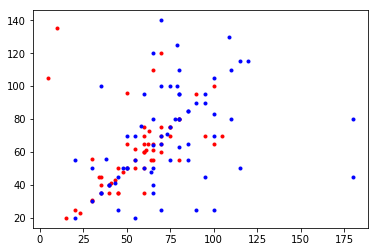

In [147]:
matrix_mean_water = [df.loc[df['Type 1'] == 'Water','Total'].mean(),
                     df.loc[df['Type 1'] == 'Water','HP'].mean(),
                     df.loc[df['Type 1'] == 'Water','Attack'].mean(),
                     df.loc[df['Type 1'] == 'Water','Defense'].mean(),
                     df.loc[df['Type 1'] == 'Water','Sp. Atk'].mean(),
                     df.loc[df['Type 1'] == 'Water','Sp. Def'].mean(),
                     df.loc[df['Type 1'] == 'Water','Speed'].mean()]


matrix_mean_normal = [df.loc[df['Type 1'] == 'Normal','Total'].mean(),
                      df.loc[df['Type 1'] == 'Normal','HP'].mean(),
                      df.loc[df['Type 1'] == 'Normal','Attack'].mean(),
                      df.loc[df['Type 1'] == 'Normal','Defense'].mean(),
                      df.loc[df['Type 1'] == 'Normal','Sp. Atk'].mean(),
                      df.loc[df['Type 1'] == 'Normal','Sp. Def'].mean(),
                      df.loc[df['Type 1'] == 'Normal','Speed'].mean(),]





plt.plot(df[df['Type 1'] == 'Normal']['Defense'],df[df['Type 1'] == 'Normal']['Sp. Def'],'r.',
         df[df['Type 1'] == 'Water']['Defense'],df[df['Type 1'] == 'Water']['Sp. Def'],'b.',
       )

#plt.plot(matrix_mean_water[0],matrix_mean_water[1],'bd',matrix_mean_normal[0],matrix_mean_normal[1],'rd',markersize=19,)

In [148]:
print('water mean',matrix_mean_water)
print('Normal mean',matrix_mean_normal)

water mean [420.4347826086956, 71.26086956521739, 73.65217391304348, 73.31884057971014, 69.57971014492753, 69.08695652173913, 63.53623188405797]
Normal mean [387.0175438596491, 78.29824561403508, 68.42105263157895, 56.12280701754386, 55.40350877192982, 61.05263157894737, 67.71929824561404]


In [149]:
#df[df['Type 1'] == 'Water']['Defense'].count
number_of_Water = 60
number_of_normal = 50
number_of_total = number_of_Water + number_of_normal
P_c1 = number_of_Water/number_of_total
P_c2 = number_of_normal/number_of_total
print(P_c1)
print(P_c2)

0.5454545454545454
0.45454545454545453


In [150]:
df_water_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 9 to 348
Data columns (total 13 columns):
#             60 non-null int64
Name          60 non-null object
Type 1        60 non-null object
Type 2        33 non-null object
Total         60 non-null int64
HP            60 non-null int64
Attack        60 non-null int64
Defense       60 non-null int64
Sp. Atk       60 non-null int64
Sp. Def       60 non-null int64
Speed         60 non-null int64
Generation    60 non-null int64
Legendary     60 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 6.2+ KB


In [151]:
Total_matrix_water =   np.array(df_water_train['Total']-matrix_mean_water[0])
HP_matrix_water =      np.array(df_water_train['HP']-matrix_mean_water[1])
Attack_matrix_water =  np.array(df_water_train['Attack']-matrix_mean_water[2])
Defense_matrix_water = np.array(df_water_train['Defense']-matrix_mean_water[3])
SpAtk_matrix_water =   np.array(df_water_train['Sp. Atk']-matrix_mean_water[4])
SpDef_matrix_water =   np.array(df_water_train['Sp. Def']-matrix_mean_water[5])
Speed_matrix_water =   np.array(df_water_train['Speed']-matrix_mean_water[6])

combined_water = np.vstack((Total_matrix_water, HP_matrix_water,Attack_matrix_water,
                            Defense_matrix_water,SpAtk_matrix_water,SpDef_matrix_water,Speed_matrix_water)).T
#SpDef_matrix_water
#Total_matrix_water

# P(x|C1) Water Trainning model

In [152]:
Total_matrix_water =   np.array(df_water_train['Total']-matrix_mean_normal[0])
HP_matrix_water =      np.array(df_water_train['HP']-matrix_mean_normal[1])
Attack_matrix_water =  np.array(df_water_train['Attack']-matrix_mean_normal[2])
Defense_matrix_water = np.array(df_water_train['Defense']-matrix_mean_normal[3])
SpAtk_matrix_water =   np.array(df_water_train['Sp. Atk']-matrix_mean_normal[4])
SpDef_matrix_water =   np.array(df_water_train['Sp. Def']-matrix_mean_normal[5])
Speed_matrix_water =   np.array(df_water_train['Speed']-matrix_mean_normal[6])

combined_water = np.vstack((Total_matrix_water, HP_matrix_water,Attack_matrix_water,
                            Defense_matrix_water,SpAtk_matrix_water,SpDef_matrix_water,Speed_matrix_water)).T


#x_matrix_water = np.mat(combined_water[0])
#np.dot(x_matrix_water.T,x_matrix_water)
x_matrix_total_water = np.zeros([7, 7]) 
for i in range(number_of_Water): 
    
    x_matrix_water = np.mat(combined_water[i])
    x_matrix_total_water = x_matrix_total_water + np.dot(x_matrix_water.T,x_matrix_water)
x_matrix_total_water = x_matrix_total_water/number_of_Water
x_matrix_total_water
inverse_water = np.linalg.inv(x_matrix_total_water)


# P(x|C2) Normal Trainning model

In [153]:
Total_matrix_normal =   np.array(df_Normal_train['Total']-matrix_mean_normal[0])
HP_matrix_normal =      np.array(df_Normal_train['HP']-matrix_mean_normal[1])
Attack_matrix_normal =  np.array(df_Normal_train['Attack']-matrix_mean_normal[2])
Defense_matrix_normal = np.array(df_Normal_train['Defense']-matrix_mean_normal[3])
SpAtk_matrix_normal =   np.array(df_Normal_train['Sp. Atk']-matrix_mean_normal[4])
SpDef_matrix_normal =   np.array(df_Normal_train['Sp. Def']-matrix_mean_normal[5])
Speed_matrix_normal =   np.array(df_Normal_train['Speed']-matrix_mean_normal[6])

combined_normal = np.vstack((Total_matrix_normal, HP_matrix_normal,Attack_matrix_normal,
                            Defense_matrix_normal,SpAtk_matrix_normal,SpDef_matrix_normal,Speed_matrix_normal)).T

#x_matrix_normal = np.mat(combined_normal[0])
#np.dot(x_matrix.T,x_matrix)
x_matrix_total_normal = np.zeros([7, 7]) 
for i in range(number_of_normal): 
    
    x_matrix_normal = np.mat(combined_normal[i])
    x_matrix_total_normal = x_matrix_total_normal + np.dot(x_matrix_normal.T,x_matrix_normal)
x_matrix_total_normal = x_matrix_total_normal/number_of_normal
x_matrix_total_normal
inverse_normal = np.linalg.inv(x_matrix_total_normal)


In [154]:
inverse = ((5/11)*(inverse_normal)) + ((6/11)*(inverse_water))

# Classification

In [155]:
def Classification(x,result,index) : 
    
    
    x = np.mat(x)
    matrix_water = np.dot(np.dot((x-matrix_mean_water),inverse),(x-matrix_mean_water).T)
    e_c1 = math.exp(-0.5*matrix_water)
    absdet_c1 = math.sqrt(abs(np.linalg.det(x_matrix_total_water)))
    pi = (math.pi)**(7/2)
    P_x_C1 = e_c1/(absdet_c1*pi)
    
    matrix_normal = np.dot(np.dot((x-matrix_mean_normal),inverse),(x-matrix_mean_normal).T)
    e_c2= (math.exp(-0.5*matrix_normal))/\
    absdet_c2(math.sqrt(abs(np.linalg.det(x_matrix_total_normal)))*
    P_x_C2 = e_c2/(absdet_c2*pi)
              
    probability_c1_x = P_x_C1*P_c1/((P_x_C2*P_c2)+(P_x_C1*P_c1))
    probability_c2_x = P_x_C2*P_c2/((P_x_C2*P_c2)+(P_x_C1*P_c1))
    '''
    print('matrix_water : ', matrix_water)
    print('matrix_normal : ', matrix_normal)
    '''
    print('P_x_C1 : ', probability_c1_x)
    print('P_x_C2 : ', probability_c2_x)   
    
    
    if probability_c1_x > probability_c2_x :
        result.append('Water')
        print('water class probability : ',probability_c1_x)
    else:
        result.append('Normal')
        print('Normal class probability: ',probability_c2_x)
    
    return result

SyntaxError: invalid syntax (<ipython-input-155-88e732beff43>, line 15)

In [ ]:
df_water_train['pre']='NaN'

In [ ]:
#x_test = [73.31884057971014,69.08695652173913]
Total_matrix_water_test =   np.array(df_water_train['Total'])
HP_matrix_water_test =      np.array(df_water_train['HP'])
Attack_matrix_water_test =  np.array(df_water_train['Attack'])
Defense_matrix_water_test = np.array(df_water_train['Defense'])
SpAtk_matrix_water_test =   np.array(df_water_train['Sp. Atk'])
SpDef_matrix_water_test =   np.array(df_water_train['Sp. Def'])
Speed_matrix_water_test =   np.array(df_water_train['Speed'])

combined_water_test = np.vstack((Total_matrix_water_test, HP_matrix_water_test,Attack_matrix_water_test,
                            Defense_matrix_water_test,SpAtk_matrix_water_test,SpDef_matrix_water_test,Speed_matrix_water_test)).T

result = []

for i in range(60): 
    #result.append(Classification(combined_water[i],df_water_test,i))
    re = Classification(combined_water_test[i],result,i)
#print(result)
#print(result[0])
#dff.iloc[:][13] = range(52)
#print(result/number_of_Water)

In [ ]:
combined_water_test[0]

In [ ]:
df_water_train['pre'] = re

In [ ]:
df_water_train.head(100)

In [ ]:
(df_water_train['Type 1'] == df_water_train['pre']).sum()

In [ ]:
def Classification_count(x) : 
    
    
    x = np.mat(x)
    matrix_water = np.dot(np.dot((x-matrix_mean_water),inverse_water),(x-matrix_mean_water).T)
    P_x_C1 = math.exp(-0.5*matrix_water)/((np.linalg.det(x_matrix_total_water)**0.5)*(math.pi))
    matrix_normal = np.dot(np.dot((x-matrix_mean_normal),inverse_normal),(x-matrix_mean_normal).T)
    P_x_C2 = math.exp(-0.5*matrix_normal)/(((np.linalg.det(x_matrix_total_normal))**0.5)*(math.pi))
    
    probability_c1_x = P_x_C1*P_c1/((P_x_C2*P_c2)+(P_x_C1*P_c1))
    probability_c2_x = P_x_C2*P_c2/((P_x_C2*P_c2)+(P_x_C1*P_c1))
    
    return probability_c1_x , probability_c2_x

In [ ]:
#計算x,y座標對應的高度值 
Z = np.zeros([256, 256])
# 生成x,y的資料 
n = 256 
x = np.linspace(0, 175, n) 
y = np.linspace(0, 140, n) 
# 把x,y資料生成mesh網格狀的資料，因為等高線的顯示是在網格的基礎上新增上高度值 
X, Y = np.meshgrid(x, y) 
for j in range(n):
    for i in range(n):
        Z[i][j] = Classification_count([X[i][j],Y[i][j]])[0]
    
# 填充等高線 
plt.contourf(X, Y, Z) 



In [ ]:
#計算x,y座標對應的高度值 
Z = np.zeros([256, 256])
# 生成x,y的資料 
n = 256 
x = np.linspace(0, 195, n) 
y = np.linspace(0, 140, n) 
# 把x,y資料生成mesh網格狀的資料，因為等高線的顯示是在網格的基礎上新增上高度值 
X, Y = np.meshgrid(x, y) 
for j in range(n):
    for i in range(n):
        Z[i][j] = Classification_count([X[i][j],Y[i][j]])[1]
    


In [ ]:
plt.contour(X, Y, Z,20) 
matrix_mean_water = [df.loc[df['Type 1'] == 'Water','Defense'].mean(),df.loc[df['Type 1'] == 'Water','Sp. Def'].mean()]
matrix_mean_normal= [df.loc[df['Type 1'] == 'Normal','Defense'].mean(),df.loc[df['Type 1'] == 'Normal','Sp. Def'].mean()]

plt.plot(df[df['Type 1'] == 'Normal']['Defense'],df[df['Type 1'] == 'Normal']['Sp. Def'],'r.',
         df[df['Type 1'] == 'Water']['Defense'],df[df['Type 1'] == 'Water']['Sp. Def'],'b.',
       )

plt.plot(matrix_mean_water[0],matrix_mean_water[1],'bd',
         matrix_mean_normal[0],matrix_mean_normal[1],'rd',markersize=19,
        )